## Observations and Insights 

In [65]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Create path to data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mice_data = pd.read_csv(mouse_metadata_path)
results_data = pd.read_csv(study_results_path)

# Combine the data into a single dataset
# Merge our two data frames together
mice_df = pd.merge(mice_data, results_data)
mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [66]:
# Checking the number of mice in the DataFrame
count_mice = len(mice_df["Mouse ID"].unique())
count_mice

249

In [67]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mice = mice_df.loc[mice_df['Timepoint']==0]['Mouse ID'].value_counts()
duplicated_mice

g989    2
f545    1
k894    1
i669    1
n923    1
       ..
l471    1
l872    1
q787    1
n678    1
r921    1
Name: Mouse ID, Length: 249, dtype: int64

In [68]:
duplicated_mice_ID = duplicated_mice.loc[duplicated_mice != 1]
duplicated_mice_ID

g989    2
Name: Mouse ID, dtype: int64

In [69]:
# Optional: Get all the data for the duplicate mouse ID. 
# DataFrame.duplicated
all_duplicated_mouse_ID = mice_df[mice_df.duplicated(subset=['Mouse ID','Timepoint'], keep= False)]
all_duplicated_mouse_ID

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [70]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# df.drop_duplicates(subset=['brand', 'style'], keep='last')
cleaned_mice_df = mice_df.drop_duplicates()
cleaned_mice_df    # .loc[cleaned_mice_df['Mouse ID']== "g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [71]:
# Checking the number of mice in the clean DataFrame.
count_cleaned_mice_df = cleaned_mice_df['Mouse ID'].value_counts()
count_cleaned_mice_df

g989    12
o331    10
p189    10
k862    10
z795    10
        ..
x226     1
n482     1
l872     1
b447     1
x336     1
Name: Mouse ID, Length: 249, dtype: int64

In [72]:
len(count_cleaned_mice_df)

249

## Summary Statistics

In [122]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straightforward, creating multiple series and putting them all together at the end.
# mean with np mean_numpy = np.mean(temperatures)
# Mean of each Drug Regimen
mean_tumor_volume = cleaned_mice_df.groupby(['Drug Regimen']).mean()
mean_tumor_volume['Tumor Volume (mm3)']
mean_data = mean_tumor_volume['Tumor Volume (mm3)']
mean_data

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.368318
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [123]:
# Median of each Drug Regimen 
median_tumor_volume = cleaned_mice_df.groupby(['Drug Regimen']).median()
median_tumor_volume['Tumor Volume (mm3)']
median_data = median_tumor_volume['Tumor Volume (mm3)']
median_data

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.909965
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [135]:
# Variance of each Drug Regimen 
var_tumor_volume = cleaned_mice_df.groupby(['Drug Regimen']).var()
var_tumor_volume['Tumor Volume (mm3)']
var_data = var_tumor_volume['Tumor Volume (mm3)']
var_data

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     42.278090
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [127]:
# Standard Deviation of each Drug Regimen 
std_tumor_volume = cleaned_mice_df.groupby(['Drug Regimen']).std()
std_tumor_volume['Tumor Volume (mm3)']
std_data = std_tumor_volume['Tumor Volume (mm3)']
std_data

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.502160
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [128]:
# SEM of each Drug Regimen 
sem_tumor_volume = cleaned_mice_df.groupby(['Drug Regimen']).sem()
sem_tumor_volume['Tumor Volume (mm3)']
sem_data = sem_tumor_volume['Tumor Volume (mm3)']
sem_data

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.514041
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [144]:
# pd.concat([s1, s2], axis=1).reset_index()
indv_stat_regimen_ccdf = pd.concat([mean_data, median_data, var_data, std_data, sem_data], axis=1)
indv_stat_regimen_ccdf

,Tumor Volume (mm3),Tumor Volume (mm3),Tumor Volume (mm3),Tumor Volume (mm3),Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [145]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen using df.groupby().agg()
# This method produces everything in a single groupby function
summary_stat_regimen_ccdf = cleaned_mice_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})
summary_stat_regimen_ccdf

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.368318  50.909965  42.278090  6.502160  0.514041
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar Plots

In [147]:
cleaned_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


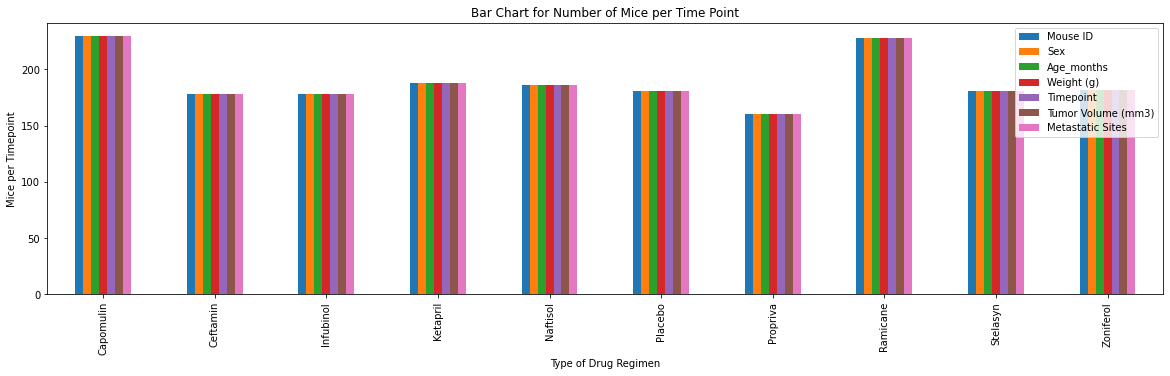

In [204]:
# # Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
# drug_regimen_list = cleaned_mice_df.groupby('Drug Regimen')
# number_mice_regimen = drug_regimen_list['Timepoint'].count()
# number_mice_regimen

# # Create a bar chart based off of the group series from before
# make_chart = number_mice_regimen.plot(kind='bar')

# # Set the xlabel and ylabel using class methods
# make_chart.set_xlabel("Car Manufacturer")
# make_chart.set_ylabel("Number of Cars")

# plt.tight_layout()
# plt.show()


# drug_regimen_list = cleaned_mice_df['Drug Regimen']
# time_point_list = cleaned_mice_df['Timepoint']
# x_axis = np.arange(len(time_point_list))
# tick_locations = [value for value in x_axis]


# # Create a bar chart based upon the above data
# plt.bar(x_axis, time_point_list, align="center")

# # Create the ticks for our bar chart's x axis
# plt.xticks(tick_locations, drug_regimen_list)

# # # Give the chart a title, x label, and y label
# plt.title("Pandas Way - Number of Mice per Timepoint for each Treatment")
# plt.xlabel("Type of Treatments")
# plt.ylabel("Mice per Timepoint")

# # # Save an image of the chart and print it to the screen
# # plt.savefig("../Images/BarDensity.png")
# plt.tight_layout()
# plt.show()


bar_num_ccdf = cleaned_mice_df.groupby('Drug Regimen').count()

make_chart = bar_num_ccdf.plot(kind='bar',figsize=(20,5))

# Set a title for the chart
plt.title("Bar Chart for Number of Mice per Time Point")
make_chart.set_xlabel("Type of Drug Regimen")
make_chart.set_ylabel("Mice per Timepoint")

#plt.tight_layout()
plt.show()

<AxesSubplot:title={'center':'PyPlot Way - Number of Mice per Timepoint for each Treatment'}, xlabel='Drug Regimen', ylabel='Mice per Timepoint'>

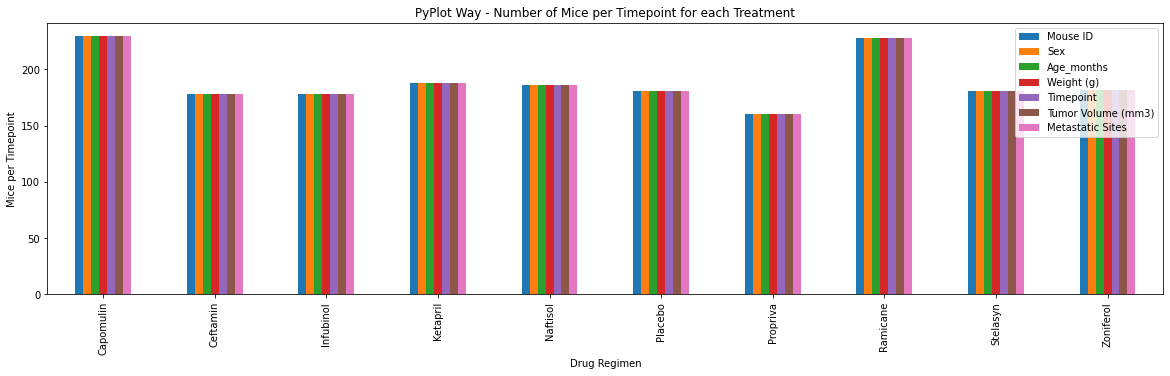

In [206]:
# make bar
bar_num_ccdf.plot(kind="bar",
             figsize=(20,5),
             title= "PyPlot Way - Number of Mice per Timepoint for each Treatment", 
             ylabel="Mice per Timepoint")

In [10]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

#plt.bar(
#     x_axis,
#     y_axis,
#     color='red',
#     alpha=0.5,
#     align='center'
# )

## Pie Plots

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# #plt.pie(
#     y_axis,
#     labels=[''],
#     explode=(),
#     colors=[''],
#     autopct="%1.1f%%",
#     shadow=True,
#     startangle=140
# )

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Determine if there are any potential outliers in the average occupancy in California
quartiles = california_data['AveOccup'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of occupancy is: {lowerq}")
print(f"The upper quartile of occupancy is: {upperq}")
print(f"The interquartile range of occupancy is: {iqr}")
print(f"The the median of occupancy is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_occupancy = california_data.loc[(california_data['AveOccup'] < lower_bound) | (california_data['AveOccup'] > upper_bound)]
outlier_occupancy

# With the potential outliers, what is the lowest and highest median income (in $1000s) observed?
print(f"The minimum median income of the potential outliers is {outlier_occupancy['MedInc'].min()}")
print(f"The maximum median income of the potential outliers is {outlier_occupancy['MedInc'].max()}")

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [15]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
x_values = housing_data['RM']
y_values = housing_data['MEDV']
plt.xlabel('Rooms in House')
plt.ylabel('Median House Prices ($1000)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [16]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
# plt.scatter(
#     x_axis,
#     y_axis,
#     marker='o',
#     facecolors='red',
#     edgecolors='black',
#     alpha=0.1
# )


## Correlation and Regression

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_values = housing_data['RM']
y_values = housing_data['MEDV']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Rooms in House')
plt.ylabel('Median House Prices ($1000)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

